# Importing required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset into data frame

Reading data from CSV file into data frame named st

In [113]:
st = pd.read_csv('student_data.csv')

Showing the first 5 observations of the data dataset. By doing this we can get idea of the dataset.

In [114]:
st.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# 1 Characterization of dataset

To know how big the dataset is we use 'shape'. It shows the total number of observations and variables. 

In [68]:
st.shape

(4424, 37)

Checking the data types of variables

In [115]:
st.dtypes

Marital status                                     object
Application mode                                    int64
Application order                                   int64
Course                                            float64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                            float64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                          object
Educational special needs                           int64
Debtor                                            float64
Tuition fees up to date                            object
Gender        

This is total type of variables 

In [119]:
pd.value_counts(st.dtypes)

int64      19
float64    12
object      6
Name: count, dtype: int64

Checking duplicate data

In [120]:
duplicate_rows_aps = st[st.duplicated()]
print("number of duplicate rows:", duplicate_rows_aps.shape)

number of duplicate rows: (0, 37)


As we can see in this dataset there is no duplicate rows.

# Checking number of missing values of each features

In [99]:
st.isna().sum()

Marital status                                    1
Application mode                                  0
Application order                                 0
Course                                            1
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            1
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   1
Displaced                                         1
Educational special needs                         0
Debtor                                            1
Tuition fees up to date                           2
Gender                                            0
Scholarship holder                                0
Age at enrol

In [126]:
st_course = st['Course'].unique()
print(st_course)

[ 171. 9254. 9070. 9773. 8014. 9991. 9500. 9238. 9670. 9853. 9085. 9130.
 9556. 9147. 9003.   33. 9119.   nan]


In [127]:
st_Marital = st['Marital status'].unique()
print(st_Marital)

['1' '2' '4' '?' '3' '5' '6']


In [152]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("student_data.csv", na_values = missing_value_formats)

def make_int(i):
    try:
        return int(i)
    except:
        return np.nan

In [153]:
missing_values = st.columns[st.isna().any()].tolist()
print("Columns with missing values")
print(missing_values)

Columns with missing values
['Course', "Father's qualification", 'Admission grade', 'Debtor', 'Tuition fees up to date', 'International', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (grade)']


# 2. Exploratory Data Analysis

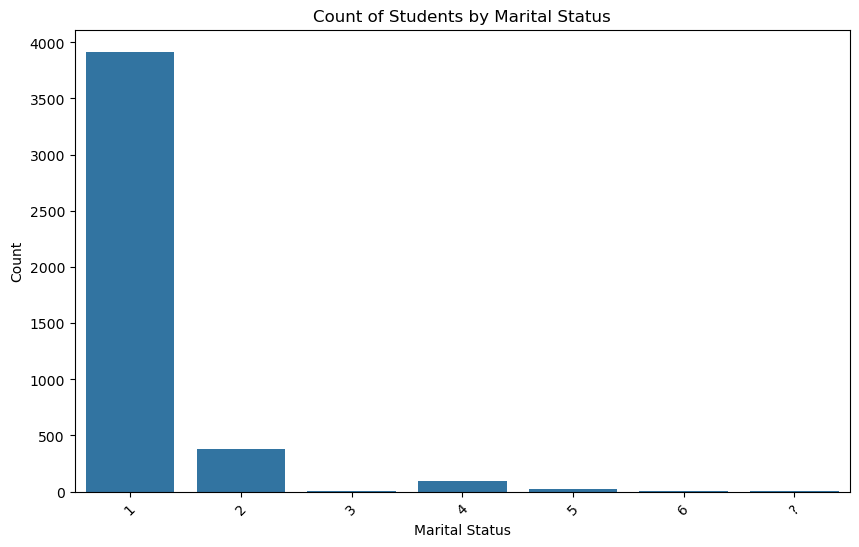

In [142]:
plt.figure(figsize=(10, 6))
sns.countplot(data=st, x='Marital status')
plt.title('Count of Students by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

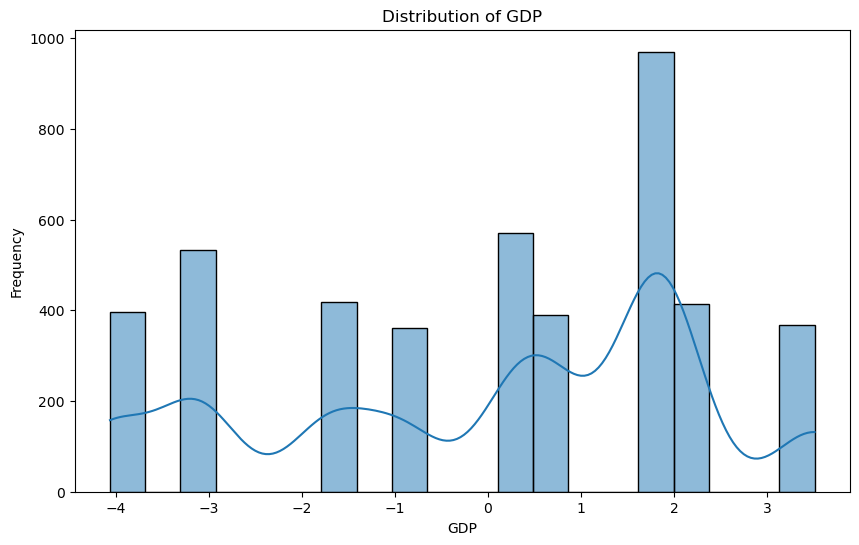

In [143]:
plt.figure(figsize=(10, 6))
sns.histplot(data=st, x='GDP', bins=20, kde=True)
plt.title('Distribution of GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

In [144]:
plt.figure(figsize=(10, 8))
sns.heatmap(st.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '?'

<Figure size 1000x800 with 0 Axes>

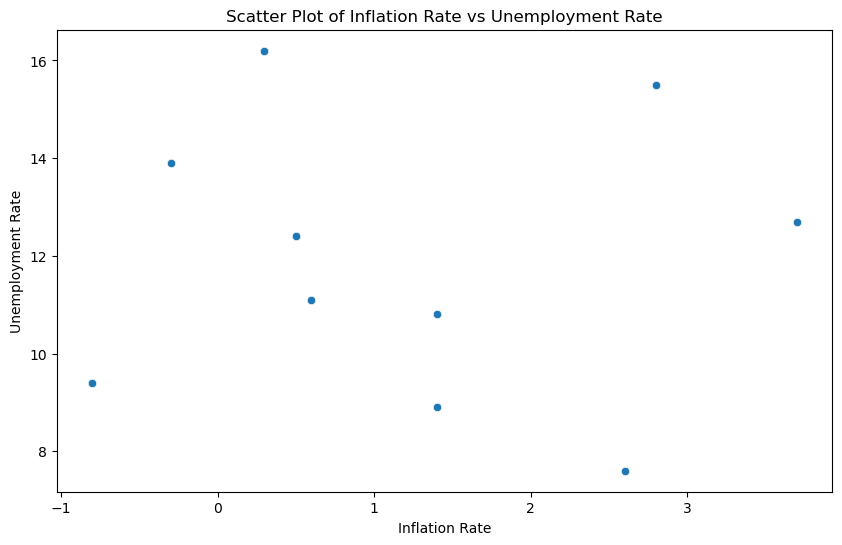

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=st, x='Inflation rate', y='Unemployment rate')
plt.title('Scatter Plot of Inflation Rate vs Unemployment Rate')
plt.xlabel('Inflation Rate')
plt.ylabel('Unemployment Rate')
plt.show()